In [1]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [4]:
num_frames = 50

images = loadVideo("dataset/2011_09_26", num_frames)

In [5]:
images = cropImages(images)

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  50
Cropped Image size:  (200, 200)


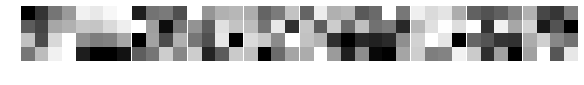

In [6]:
patch_size = 4
num_samples = 100
num_features = 10
    
# features = generatePCADictionary(images, patch_size, num_samples, num_features)
features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)

plotDictionary(features)

In [7]:
# Reconstructed image
k = 1000
S_code = orthogonalMatchingPursuit(images[0], features, k)

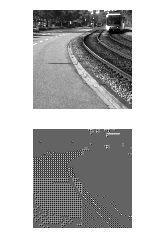

Unique Codes:  1000
1000


In [8]:
recon_image = generateReconImage(S_code, images[0], features)

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.imshow(images[0], cmap="Greys_r")
ax1.axis("off")

ax2.imshow(recon_image, cmap="Greys_r")
ax2.axis("off")

plt.show()

print("Unique Codes: ", len(set(S_code)))
l = []
for s in S_code:
    l.append(s[:2])
print(len(set(l)))

In [9]:
# Run through whole video
S_codes = videoMatchingPursuit(images, features, k, orthogonalMatchingPursuit)

ValueError: Invalid file object: <_io.BufferedReader name=48>

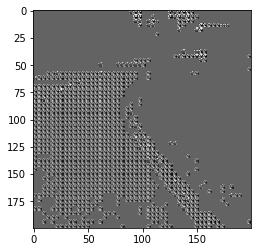

In [13]:
recon_video = generateReconVideo(S_codes, images, features)
generateGifFromVideo(recon_video, "optSparse.gif")